
# **Introducción a Python para Análisis de Datos**
## Capítulo 6: Visualización
---
**Autor:** Juan Martin Bellido  

**Descripción**  
En este capítulo exploraremos opciones avanzadas de visualización de datos utilizando la librería *matplotlib*.

**¿Feedback? ¿comentarios?** Por favor compártelo conmigo escribiéndome por [LinkedIn](https://www.linkedin.com/in/jmartinbellido/)  

**Material Adicional**

* [Guía Python Importar/Exportar DataFrames](https://datawizards.es/contenido/codigo-para-analisis-de-datos/guias/python-importar-exportar)
* [Comandos Jupyter Notebook](https://datawizards.es/contenido/codigo-para-analisis-de-datos/guias/comandos-rapidos-jupyter)
* [Sintaxis Markdown](https://datawizards.es/contenido/codigo-para-analisis-de-datos/guias/sintaxis-markdown)



## INDICE
---
1. Gráficos de dispersión
2. Gráficos de barra
3. Gráficos de serie temporal
4. Ejercicios


Convenciones utilizadas en este documento
> 👉 *Esto es una nota u observación*

> ⚠️ *Esto es una advertencia*

In [ ]:
# importamos librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import datetime

In [ ]:
%matplotlib inline

# 1. Gráficos de dispersión
---








En esta sección, exploraremos gráficos de dispersión con Matplotlib.

Documentación oficial:
* [Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)
* [Marcadores en gráficos de dispersión](https://www.tutorialsandyou.com/matplotlib/how-to-change-markers-shape-in-scatter-plot-in-matplotlib-4.html) 

In [ ]:
# importamos dataframe
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv")
df_jamesbond.dtypes

Film                  object
Year                   int64
Actor                 object
Director              object
Box Office           float64
Budget               float64
Bond Actor Salary    float64
dtype: object

### Primeros pasos con Matplotlib



```
fig, ax = plt.subplots()
```





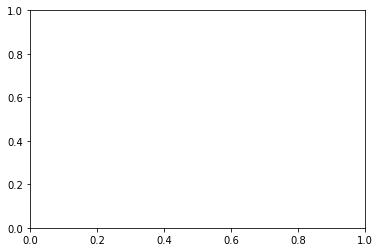

In [ ]:
# paso 1: creamos un gráfico vacío
fig, ax = plt.subplots()

Utilizamos la función `ax.scatter()` para visualizar un gráfico de dispersión.


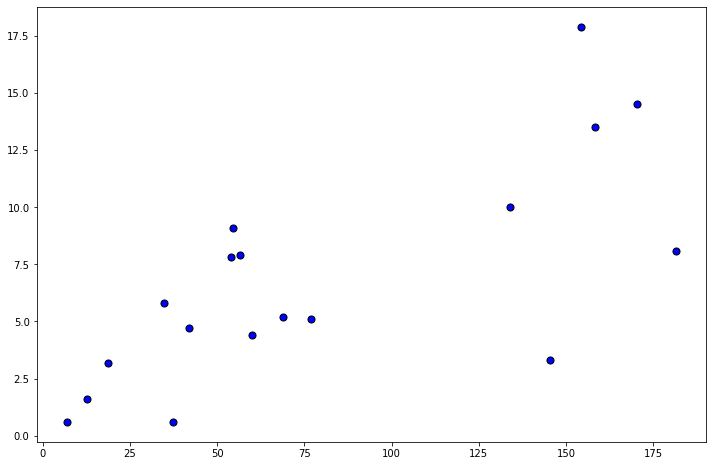

In [ ]:
# añadimos una capa gráfica adicional por encima del gráfico vacío

# paso 1: gráfico vacío
fig, ax = plt.subplots(figsize=(12, 8))

# paso 2: creamos un gráfico de dispersión encima
ax.scatter(
    df_jamesbond['Budget'], 
    df_jamesbond['Bond Actor Salary'], 
    s=50, 
    facecolor='blue', 
    edgecolor='black'
)

### Gráfico de dispersión básico

Utilizamos el método `ax.set()` para añadir configuraciones en el gráfico.


[Text(0, 0.5, 'Bond Actor Salary'),
 Text(0.5, 0, 'Budget'),
 Text(0.5, 1.0, 'Scatter Plot')]

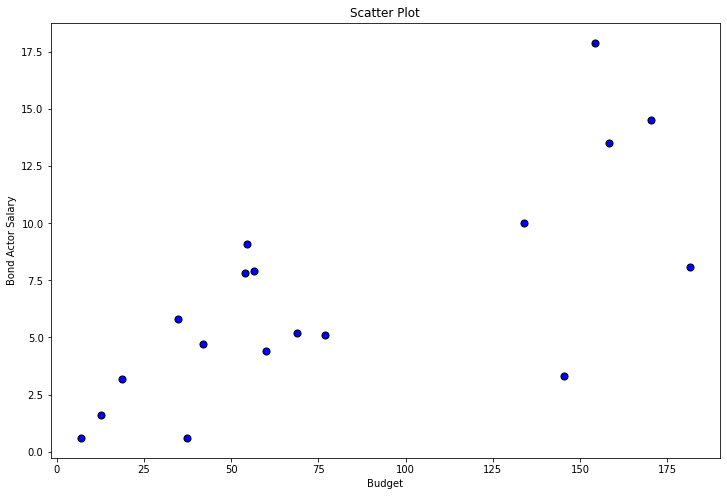

In [ ]:
# añadimos una tercer capa gráfica con títulos

# paso 1: gráfico vacío
fig, ax = plt.subplots(figsize=(12, 8))

# paso 2: creamos un gráfico de dispersión encima
ax.scatter(
    df_jamesbond['Budget'], 
    df_jamesbond['Bond Actor Salary'], 
    s=50, 
    facecolor='blue', 
    edgecolor='black'
)

# paso 3: configuramos título y nombres de ejes
ax.set(xlabel="Budget",
       ylabel="Bond Actor Salary",
       title="Scatter Plot")


Utilizamos la función `plt.savefig()` para exportar gráfico.

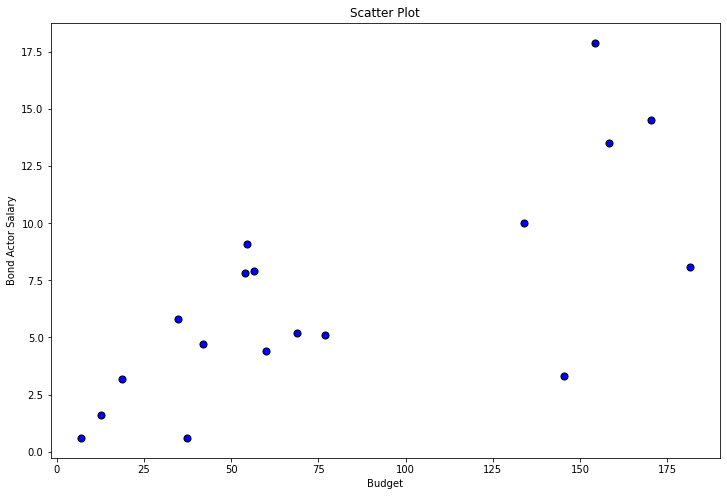

In [ ]:

# añadimos una tercer capa gráfica para añadir títulos

# paso 1: gráfico vacío
fig, ax = plt.subplots(figsize=(12, 8))

# paso 2: creamos un gráfico de dispersión encima
ax.scatter(
    df_jamesbond['Budget'], 
    df_jamesbond['Bond Actor Salary'], 
    s=50, 
    facecolor='blue', 
    edgecolor='black'
)

# paso 3: configuramos título y nombres de ejes
ax.set(xlabel="Budget",
       ylabel="Bond Actor Salary",
       title="Scatter Plot")

# paso 4: exportamos gráfico
plt.savefig('my_chart.png', dpi=100)

### Gráfico de dispersión avanzado

A continuación, superpondremos gráficos de dispersión utilizando `ax.scatter()` para distintos grupos de observaciones. En cada función editamos los parámetros `marker` y `label` para distinguir observaciones con una forma y una etiqueta específica.


El método `ax.legend()` permite desplegar etiquetas.

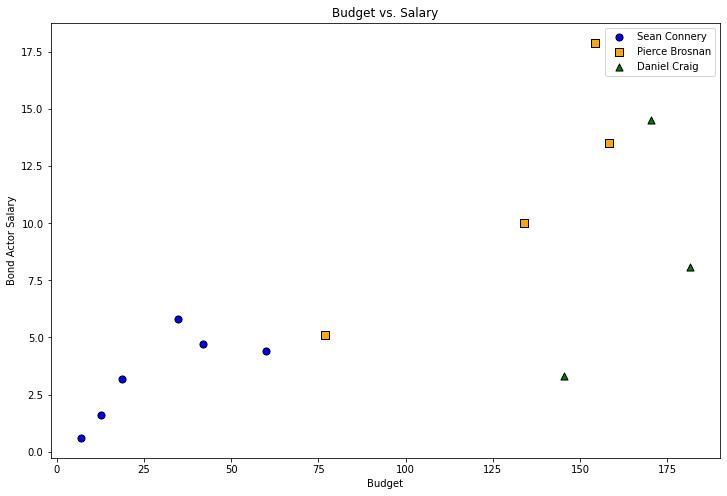

In [ ]:
# realizamos un gráfico avanzado, donde distinguimos observaciones específicas para cada actor

# paso 1: gráfico vacío, ajustamos tamaño con parámetro figsize
fig, ax = plt.subplots(figsize=(12, 8))

# paso 2: creamos un gráfico de dispersión encima
ax.scatter(
    df_jamesbond[df_jamesbond['Actor']=='Sean Connery']['Budget'], 
    df_jamesbond[df_jamesbond['Actor']=='Sean Connery']['Bond Actor Salary'],
    label='Sean Connery',
    s=50,
    marker='o',    
    facecolor='blue', 
    edgecolor='black'
)

# paso 3: creamos un segundo gráfico de dispersión encima
ax.scatter(
    df_jamesbond[df_jamesbond['Actor']=='Pierce Brosnan']['Budget'], 
    df_jamesbond[df_jamesbond['Actor']=='Pierce Brosnan']['Bond Actor Salary'],
    label='Pierce Brosnan',
    s=50,
    marker='s',
    facecolor='orange', 
    edgecolor='black'
)

# paso 4: creamos un tercer gráfico de dispersión encima
ax.scatter(
    df_jamesbond[df_jamesbond['Actor']=='Daniel Craig']['Budget'], 
    df_jamesbond[df_jamesbond['Actor']=='Daniel Craig']['Bond Actor Salary'],
    label='Daniel Craig',
    s=50,
    marker='^',
    facecolor='green', 
    edgecolor='black'
)

# paso 5: configuramos título y nombres de ejes
ax.set(xlabel="Budget",
       ylabel="Bond Actor Salary",
       title="Budget vs. Salary"
)

# paso 6: configuración adicional: desplegamos etiquetas
ax.legend()

### Combinar múltiples gráficos

[Text(0, 0.5, 'Bond Actor Salary'),
 Text(0.5, 0, 'Budget'),
 Text(0.5, 1.0, 'Pierce Brosnan')]

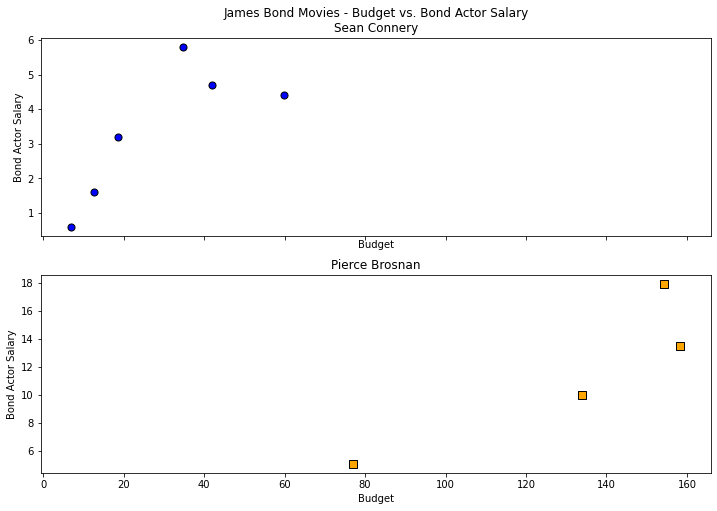

In [ ]:
# gráfico 3

# paso 1: gráfico vacío con 2 subplots (2 filas x 1 columna)
fig, ax = plt.subplots(
  nrows=2,              # filas
  ncols=1,              # columnas
  sharex=True,          # editamos para que los gráficos compartan escala en eje x
  figsize=(12, 8)
)

# paso 2 (subplot 1): creamos un gráfico de dispersión
ax[0].scatter(
    df_jamesbond[df_jamesbond['Actor']=='Sean Connery']['Budget'], 
    df_jamesbond[df_jamesbond['Actor']=='Sean Connery']['Bond Actor Salary'],
    s=50,
    marker='o',
    facecolor='blue', 
    edgecolor='black'
)

# paso 3 (subplot 1): configuramos título y nombres de ejes
ax[0].set(
    xlabel="Budget",
    ylabel="Bond Actor Salary",
    title="James Bond Movies - Budget vs. Bond Actor Salary\nSean Connery"
)

# paso 4 (subplot 2): creamos un gráfico de dispersión
ax[1].scatter(
    df_jamesbond[df_jamesbond['Actor']=='Pierce Brosnan']['Budget'], 
    df_jamesbond[df_jamesbond['Actor']=='Pierce Brosnan']['Bond Actor Salary'],
    s=50,
    marker='s',
    facecolor='orange', 
    edgecolor='black'
)

# paso 5 (subplot 2): configuramos título y nombres de ejes
ax[1].set(
    xlabel="Budget",
    ylabel="Bond Actor Salary",
    title="Pierce Brosnan"
)

[Text(0, 0.5, 'Bond Actor Salary'),
 Text(0.5, 0, 'Budget'),
 Text(0.5, 1.0, 'Roger Moore')]

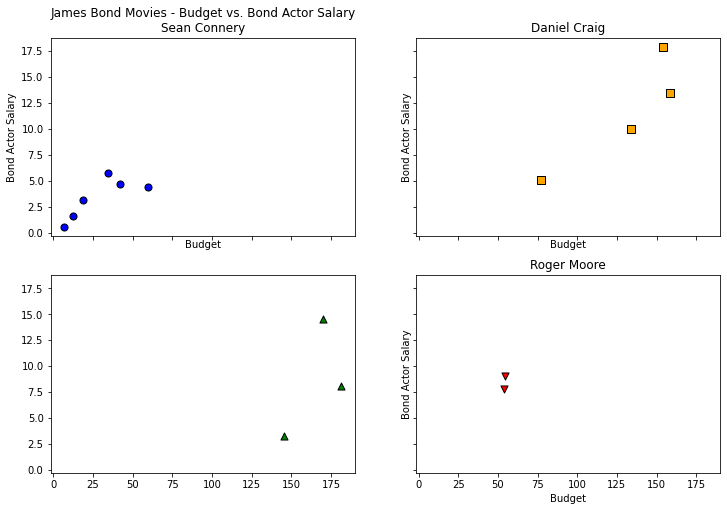

In [ ]:
# Gráfico 4
# paso 1: gráfico vacío con 4 subplots (2 filas x 2 columnas)
fig, ax = plt.subplots(
    nrows=2,
    ncols=2,
    sharex=True, 
    sharey=True,              # editamos para que compartan escala en eje Y
    figsize=(12, 8)
  )

# paso 2 (subplot 1): creamos un gráfico de dispersión
ax[0,0].scatter(
    df_jamesbond[df_jamesbond['Actor']=='Sean Connery']['Budget'], 
    df_jamesbond[df_jamesbond['Actor']=='Sean Connery']['Bond Actor Salary'],
    s=50,
    marker='o',
    facecolor='blue', 
    edgecolor='black'
)

# paso 3 (subplot 1): configuramos título y nombres de ejes
ax[0,0].set(
    xlabel="Budget",
    ylabel="Bond Actor Salary",
    title="James Bond Movies - Budget vs. Bond Actor Salary\nSean Connery"
)

# paso 4 (subplot 2): creamos un gráfico de dispersión
ax[0,1].scatter(
    df_jamesbond[df_jamesbond['Actor']=='Pierce Brosnan']['Budget'], 
    df_jamesbond[df_jamesbond['Actor']=='Pierce Brosnan']['Bond Actor Salary'],
    s=50,
    marker='s',
    facecolor='orange', 
    edgecolor='black'
)

# paso 5 (subplot 2): configuramos título y nombres de ejes
ax[0,1].set(
    xlabel="Budget",
    ylabel="Bond Actor Salary",
    title="Pierce Brosnan"
)

# paso 6 (subplot 3): creamos un gráfico de dispersión
ax[1,0].scatter(
    df_jamesbond[df_jamesbond['Actor']=='Daniel Craig']['Budget'], 
    df_jamesbond[df_jamesbond['Actor']=='Daniel Craig']['Bond Actor Salary'],
    s=50,
    marker='^',
    facecolor='green', 
    edgecolor='black'
)

# paso 7 (subplot 3): configuramos título y nombres de ejes
ax[0,1].set(
    xlabel="Budget",
    ylabel="Bond Actor Salary",
    title="Daniel Craig"
)

# paso 8 (subplot 4): creamos un gráfico de dispersión
ax[1,1].scatter(
    df_jamesbond[df_jamesbond['Actor']=='Roger Moore']['Budget'], 
    df_jamesbond[df_jamesbond['Actor']=='Roger Moore']['Bond Actor Salary'],
    s=50,
    marker='v',
    facecolor='red', 
    edgecolor='black'
)

# paso 9 (subplot 4): configuramos título y nombres de ejes
ax[1,1].set(xlabel="Budget",
       ylabel="Bond Actor Salary",
       title="Roger Moore")

# 2. Gráficos de barra
---

En esta sección, exploraremos gráficos de barra con Matplotlib.

Documentación oficial:
* [Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

In [ ]:
# importamos dataframe
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv")
df_jamesbond.dtypes

Film                  object
Year                   int64
Actor                 object
Director              object
Box Office           float64
Budget               float64
Bond Actor Salary    float64
dtype: object

### Gráfico de barra básico

<BarContainer object of 7 artists>

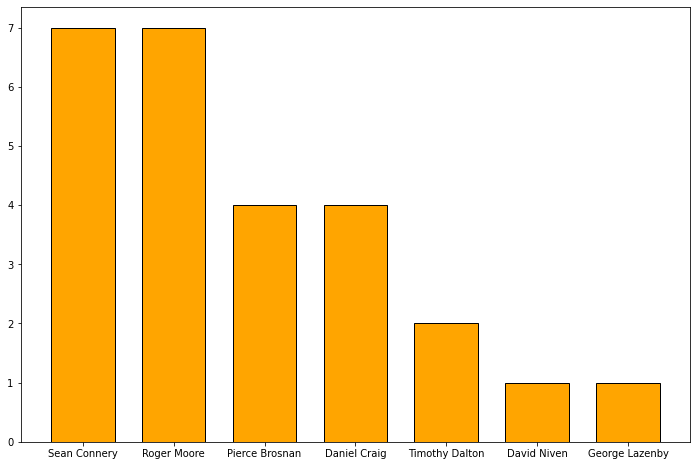

In [ ]:
# gráfico 1

# paso 0: manipulación de datos
df = df_jamesbond['Actor'].value_counts()\
    .reset_index()\
    .rename(columns={'index':'actor','Actor':'count_movies'})

# paso 1: gráfico vacío
fig, ax = plt.subplots(
    figsize=(12,8)
)

# paso 2: gráfico de barras (vertical)
ax.bar(
    df['actor'],
    df['count_movies'],
    width=0.7, 
    facecolor='orange',
    edgecolor="black"
)

<BarContainer object of 7 artists>

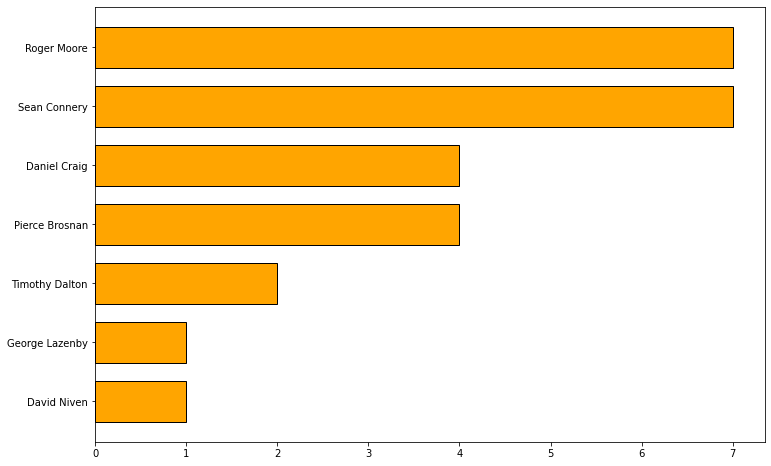

In [ ]:
# gráfico 1

# paso 0: manipulación de datos
df = df_jamesbond['Actor'].value_counts()\
    .reset_index()\
    .rename(columns={'index':'actor','Actor':'count_movies'})\
    .sort_values('count_movies')

# paso 1: gráfico vacío
fig, ax = plt.subplots(
    figsize=(12,8)
)

# paso 2: gráfico de barras (horizontal)
ax.barh(
    df['actor'],
    df['count_movies'],
    height=0.7, 
    facecolor='orange',
    edgecolor="black"
)

### Gráfico de barra avanzado

El método `ax.annotate()` permite añadir anotaciones en un gráfico. A continuación, superpondremos dos gráficos para editar colores.

[Text(0, 0.5, 'Total Number of Movies'),
 Text(0.5, 0, 'James Bond Actor'),
 Text(0.5, 1.0, 'Actors by Total Movies')]

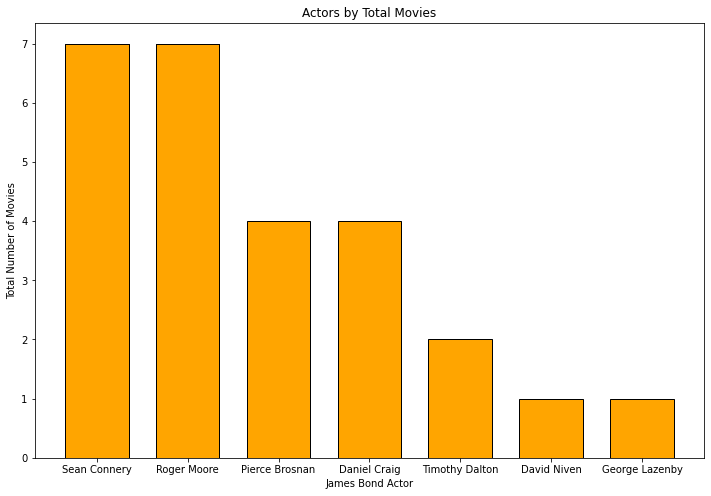

In [ ]:
# gráfico 3

# paso 0: manipulación de datos
df = df_jamesbond['Actor'].value_counts()\
    .reset_index()\
    .rename(columns={'index':'actor','Actor':'count_movies'})
    
# paso 1: gráfico vacío
fig, ax = plt.subplots(
    figsize=(12,8)
)

# paso 2: gráfico de barras (vertical)
ax.bar(
    df['actor'],
    df['count_movies'],
    width=0.7, 
    facecolor='orange',
    edgecolor="black"
)

# paso 3: gráfico de barras (vertical) para el primer actor (superponemos)
ax.bar(
    df['actor'][[0,1]],
    df['count_movies'][[0,1]],
    width=0.7, 
    facecolor='orange',
    edgecolor="black"
)

# paso 4: configuramos título y nombres de ejes
ax.set(
    xlabel="James Bond Actor",
    ylabel="Total Number of Movies",
    title="Actors by Total Movies"
)

# 3. Gráficos de series temporal
---

En esta sección, exploraremos gráficos de serie temporal con Matplotlib.

Documentación:
* [Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

In [ ]:
# importamos dataframe
df_amzn = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/amzn_stocks.csv")
df_amzn.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [ ]:
# utilizamos pd.to_datetime() para convertir columna en formato fecha
df_amzn['Date'] = pd.to_datetime(df_amzn['Date'])
df_amzn.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

### Gráfico de serie temporal básico

[Text(0, 0.5, 'Stock Rates ($)'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'AMZN Stock Rates\nJune 2017')]

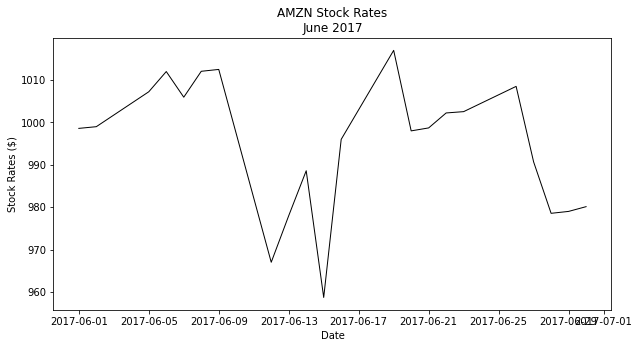

In [ ]:
# creamos condiciones para filtrar fechas
# la función pd.Timestamp nos permite convertir un input de tipo texto en fecha según el formato que usa Pandas
# no es necesario utilizar pd.Timestamp, Pandas permite filtrar fechas por texto utilizando el formato 'YYYY-MM-DD'
start_date = df_amzn['Date'] >= pd.Timestamp('2017-06-01')
end_date = df_amzn['Date'] < pd.Timestamp('2017-07-01')

# paso 1: gráfico vacío
fig, ax = plt.subplots(figsize=(10,5))

# paso 2: gráfico de serie temporal
ax.plot(
    df_amzn[start_date & end_date]['Date'],
    df_amzn[start_date & end_date]['Open'],
    color = 'black',
    linewidth=1
)

# paso 3: configuramos título y nombres de ejes 
ax.set(xlabel="Date",
       ylabel="Stock Rates ($)",
       title="AMZN Stock Rates\nJune 2017"
)

### Gráfico de serie temporal avanzado
Utilizamos las funciones `mdates.DateFormatter()` y `ax.xaxis.set_major_formatter()` para editar las etiquetas del eje x con fechas.



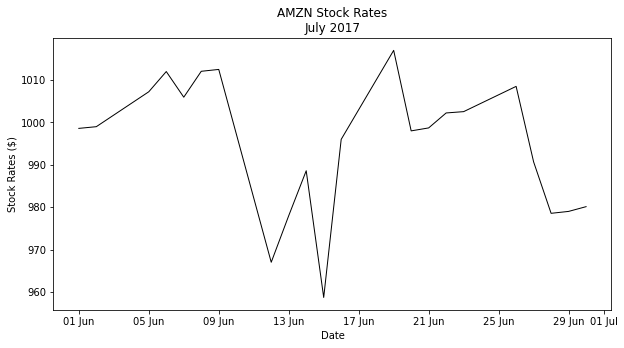

In [ ]:
# creamos condiciones para filtrar fechas
start_date = df_amzn['Date'] >= pd.Timestamp('2017-06-01')
end_date = df_amzn['Date'] < pd.Timestamp('2017-07-01')

# paso 1: gráfico vacío
fig, ax = plt.subplots(figsize=(10,5))

# paso 2: gráfico de serie temporal
ax.plot(
    df_amzn[start_date & end_date]['Date'],
    df_amzn[start_date & end_date]['Open'],
    color = 'black',
    linewidth=1
)

# paso 3: configuraciones
ax.set(xlabel="Date",
       ylabel="Stock Rates ($)",
       title="AMZN Stock Rates\nJuly 2017"
)

# paso 4: editamos etiquetas en eje x
date_form = mdates.DateFormatter("%d %b")
ax.xaxis.set_major_formatter(date_form)

Utilizamos `mdates.DayLocator(interval=x)` y `ax.xaxis.set_major_locator()` para cambiar los saltos de en el eje x, es decir, cada cuantos días queremos una etiqueta.



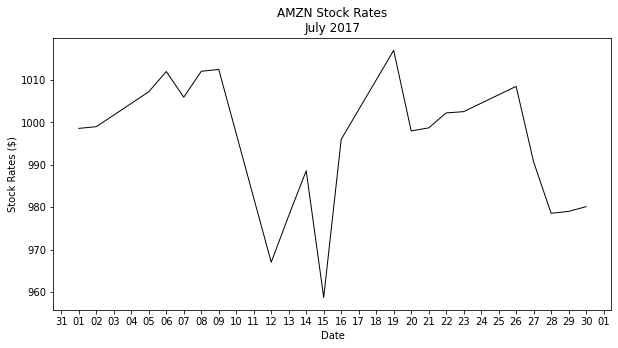

In [ ]:
# creamos condiciones para filtrar fechas
start_date = df_amzn['Date'] >= pd.Timestamp('2017-06-01')
end_date = df_amzn['Date'] < pd.Timestamp('2017-07-01')

# paso 1: gráfico vacío
fig, ax = plt.subplots(figsize=(10,5))

# paso 2: gráfico de serie temporal
ax.plot(
    df_amzn[start_date & end_date]['Date'],
    df_amzn[start_date & end_date]['Open'],
    color = 'black',
    linewidth=1
)

# paso 3: configuraciones
ax.set(xlabel="Date",
       ylabel="Stock Rates ($)",
       title="AMZN Stock Rates\nJuly 2017"
)

# paso 4: editamos etiquetas en eje x
date_form = mdates.DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

# paso 5: editamos saltos en eje x
date_loc = mdates.DayLocator(interval=1)
ax.xaxis.set_major_locator(date_loc)

Podemos filtrar directamente configurando límites en el gráfico editando `ax.set()`.

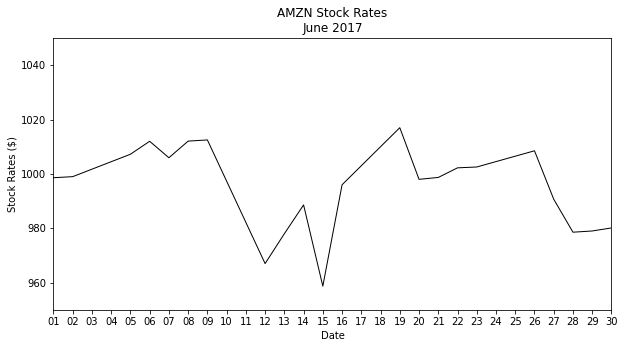

In [ ]:
# paso 1: gráfico vacío
fig, ax = plt.subplots(figsize=(10,5))

# paso 2: gráfico de serie temporal
ax.plot(
    df_amzn['Date'],
    df_amzn['Open'],
    color = 'black',
    linewidth=1
)

# paso 3: configuraciones
ax.set(xlabel="Date",
       ylabel="Stock Rates ($)",
       title="AMZN Stock Rates\nJune 2017",
       xlim=(pd.Timestamp('2017-06-01'), pd.Timestamp('2017-06-30')),
       ylim=(950, 1050)
)

# paso 4: editamos etiquetas en eje x
date_form = mdates.DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

# paso 5: editamos saltos en eje x
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

Las funciones `plt.axhline()` y `plt.axvline()` permiten graficar lineas horizontales y verticales, respectivamente.

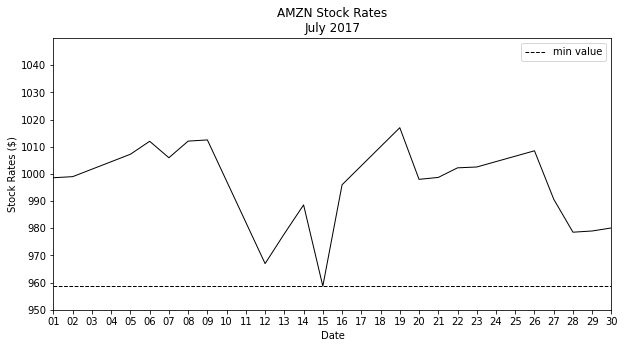

In [ ]:
# paso 1: gráfico vacío
fig, ax = plt.subplots(figsize=(10,5))

# paso 2: gráfico de serie temporal
ax.plot(
    df_amzn['Date'],
    df_amzn['Open'],
    color = 'black',
    linewidth=1
)

# paso 3: configuraciones
ax.set(xlabel="Date",
       ylabel="Stock Rates ($)",
       title="AMZN Stock Rates\nJuly 2017",
       xlim=(pd.Timestamp('2017-06-01'), pd.Timestamp('2017-06-30')),
       ylim=(950, 1050),
       yticks=np.arange(900, 1050, step=10)
)

# paso 4: editamos etiquetas en eje x
date_form = mdates.DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

# paso 5: editamos saltos en eje x
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))

# paso 6: añadimos línea horizontal
cond = df_amzn['Date'] >= pd.Timestamp('2017-06-01')
cond_1 = df_amzn['Date'] < pd.Timestamp('2017-06-30')

plt.axhline(
    y= df_amzn[cond & cond_1]['Open'].min(), # posicionamos la línea sobre el valor menor tras filtar
    color='black',
    linestyle='--',
    label='min value',
    linewidth=1
)

ax.legend()

### Combinando gráficos de serie temporal

In [ ]:
df_amzn.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [ ]:
# creamos nuevos campos
df_amzn['year'] = df_amzn['Date'].dt.year
df_amzn['month'] = df_amzn['Date'].dt.month
df_amzn['week_num'] = df_amzn['Date'].dt.isocalendar().week

In [ ]:
# manipulamos la data
df = df_amzn\
  .groupby(['year','month','week_num'])\
  .agg({'Open':'mean'})\
  .rename(columns={'Open':'avg_rate'})\
  .reset_index()

df.head()

,year,month,week_num,avg_rate
0,2010,1,1,133.3700
1,2010,1,2,129.5660
2,2010,1,3,126.5475
3,2010,1,4,123.5780
4,2010,2,5,118.7220


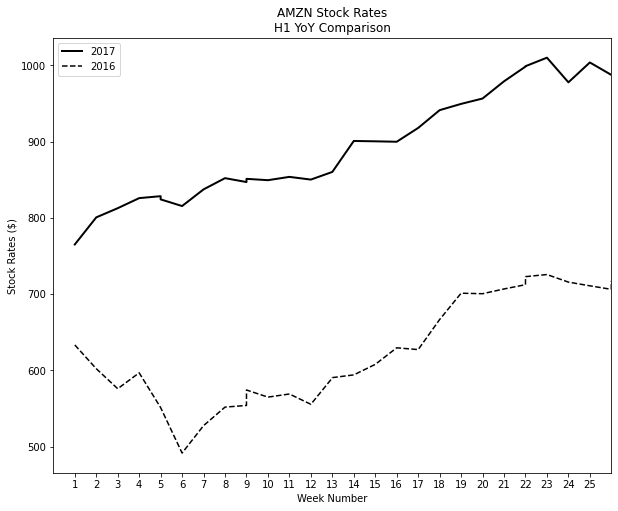

In [ ]:
# paso 1: gráfico vacío
fig, ax = plt.subplots(figsize=(10,8))

# paso 2: configuramos título y nombres de ejes; establecems límites para ejes 
ax.set(
    title="AMZN Stock Rates\nH1 YoY Comparison",
    xlabel="Week Number",
    ylabel="Stock Rates ($)",
    xticks=np.arange(1, 26, step=1),
    xlim=(0,26)
)

# paso 3: gráfico de serie temporal
cond = df['year']==2017
cond_2 = df['week_num'] <= 26

ax.plot(
    df[cond & cond_2]['week_num'],
    df[cond & cond_2]['avg_rate'],
    color = 'black',
    linewidth=2,
    label = '2017'
)

# paso 4: gráfico de serie temporal
cond = df['year']==2016
cond_2 = df['week_num'] <= 26

ax.plot(
    df[cond & cond_2]['week_num'],
    df[cond & cond_2]['avg_rate'],
    color = 'black',
    linewidth=1.5,
    linestyle='--',
    label = '2016'
)

ax.legend()

# 4. Ejercicios
---

> 👉 Puedes encontrar las soluciones a los ejercicios [aquí](https://nbviewer.org/github/jmartinbellido/Python-Curso-Introductorio/blob/main/Capitulo%206%20Ejercicios.ipynb)

### Ejercicio #1

Construir un gráfico de dispersión utilizando Matplotlib para visualizar *IMDB Score* vs *Budget* (ver imagen).


* Incluir solo películas propias de los 3 directores con mayor cantidad de películas  
* Utilizar colores y marcadores para diferenciar entre directores

> https://data-wizards.s3.amazonaws.com/datasets/movies.csv

![title](https://data-wizards.s3.amazonaws.com/img/matplotlib/EX1.png)


In [ ]:
# importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# importamos dataframe
df_movies = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/movies.csv")
df_movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

### Ejercicio #2

Repetir ejercicio #1, pero esta vez separando películas por director en gráficos independientes. Incluir un cuarto director según cantidad total de películas.

> https://data-wizards.s3.amazonaws.com/datasets/movies.csv

![title](https://data-wizards.s3.amazonaws.com/img/matplotlib/EX2.png)


In [ ]:
# importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# importamos dataframe
df_movies = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/movies.csv")
df_movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

### Ejercicio #3

El dataset contiene información histórica para un ecommerce. Construir dos gráficos de serie temporal para visualizar transacciones y visitas semanales para los primeros 6 meses de 2017.

> https://data-wizards.s3.amazonaws.com/datasets/ga_merchant_store.csv

![title](https://data-wizards.s3.amazonaws.com/img/matplotlib/EX3.png)

In [ ]:
# importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# importamos dataframe
df_google_analytics = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/ga_merchant_store.csv")
df_google_analytics.dtypes

date                object
channelGrouping     object
campaign            object
source              object
medium              object
timeOnSite         float64
bounces            float64
visits               int64
transactions       float64
newVisits          float64
dtype: object